# Quantile Regression based on FCI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

from quantile_regression_functions import Lag, fit_qr, estimate_quantiles, predict_quantiles

sns.set_style('white')

fci_quart_data = pd.read_pickle('fci_processed/double_pca_quart_fci.pkl')
#changing to percentage points
fci_quart_data = fci_quart_data.dropna(axis=0, how='any')
fci_quart_data['quarterly_ggdp_ppp_growth_annualized'] = fci_quart_data['quarterly_ggdp_ppp_growth_annualized'] * 100

quantiles = np.arange(0.05, 0.96, 0.05, dtype=float)
quantiles = np.round(quantiles, 2)

#### one quarter ahead
lag = 1
formula = f'quarterly_ggdp_ppp_growth_annualized ~ Lag(double_pca_fci, {lag})'

#estimating quantiles
qr_res_list, ols_model_summary = estimate_quantiles(quantiles, formula, fci_quart_data)
models_summary_df_1_quart = pd.DataFrame([res.to_list() for res in qr_res_list], columns=['q', 'a', 'b', 'lb', 'ub'])
#predicting quantiles
# quantiles_to_predict = [0.05, 0.25, 0.5, 0.75, 0.95]
quantiles_to_predict = quantiles
q_predict_1_quart = predict_quantiles(qr_res_list, lag, quantiles_to_predict, fci_quart_data, 'double_pca_fci',
                                      ols_model_summary=ols_model_summary)
q_predict_1_quart = q_predict_1_quart.join(fci_quart_data['quarterly_ggdp_ppp_growth_annualized'])
q_predict_1_quart = q_predict_1_quart.rename(columns={'quarterly_ggdp_ppp_growth_annualized': 'realized_ggdp_growth'})

#### one year (4 quarters) ahead
lag = 4
formula = f'quarterly_ggdp_ppp_growth_annualized ~ Lag(double_pca_fci, {lag})'

#estimating quantiles
qr_res_list, ols_model_summary = estimate_quantiles(quantiles, formula, fci_quart_data)
models_summary_df_4_quart = pd.DataFrame([res.to_list() for res in qr_res_list], columns=['q', 'a', 'b', 'lb', 'ub'])
#predicting quantiles
quantiles_to_predict = [0.05, 0.25, 0.5, 0.75, 0.95]
q_predict_4_quart = predict_quantiles(qr_res_list, lag, quantiles_to_predict, fci_quart_data, 'double_pca_fci',
                                      ols_model_summary=ols_model_summary)
q_predict_4_quart = q_predict_4_quart.join(fci_quart_data['quarterly_ggdp_ppp_growth_annualized'])
q_predict_4_quart = q_predict_4_quart.rename(columns={'quarterly_ggdp_ppp_growth_annualized': 'realized_ggdp_growth'})


#saving results both to pickle and to csv to be able to use in r
q_predict_1_quart.to_pickle('gar_analysis/q_predict_1_quart.pkl')
q_predict_1_quart.to_csv('gar_analysis/q_predict_1_quart.csv')
q_predict_4_quart.to_pickle('gar_analysis/q_predict_4_quart.pkl')
q_predict_4_quart.to_csv('gar_analysis/q_predict_4_quart.csv')


quantile: 0.05
                                  QuantReg Regression Results                                   
Dep. Variable:     quarterly_ggdp_ppp_growth_annualized   Pseudo R-squared:               0.2520
Model:                                         QuantReg   Bandwidth:                       4.931
Method:                                   Least Squares   Sparsity:                        31.78
Date:                                  Wed, 03 Jul 2024   No. Observations:                  133
Time:                                          14:48:43   Df Residuals:                      131
                                                          Df Model:                            1
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.1566      0.615     -5.130      0.000      -4.374      -1.939
Lag(double_pca_fci, 1)    -3.0530

C:\Users\yarde\PycharmProjects\ggdp_research\quantile_regression_functions.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_model_summary = dict(a=ols_model.params[0], b=ols_model.params[1], lb=ols_ci[0], ub=ols_ci[1])


quantile: 0.7
                                  QuantReg Regression Results                                   
Dep. Variable:     quarterly_ggdp_ppp_growth_annualized   Pseudo R-squared:              0.02113
Model:                                         QuantReg   Bandwidth:                       3.453
Method:                                   Least Squares   Sparsity:                        12.17
Date:                                  Wed, 03 Jul 2024   No. Observations:                  130
Time:                                          14:48:44   Df Residuals:                      128
                                                          Df Model:                            1
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.3178      0.489     12.911      0.000       5.350       7.286
Lag(double_pca_fci, 4)    -0.8414 

C:\Users\yarde\PycharmProjects\ggdp_research\quantile_regression_functions.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ols_model_summary = dict(a=ols_model.params[0], b=ols_model.params[1], lb=ols_ci[0], ub=ols_ci[1])


In [ ]:
#Creating MBB (Moving Block Bootstrap). We are using MBB because of serial correlation.
from tsbootstrap import MovingBlockBootstrap
n_samples = 10
n_bootstraps = 3
block_length = 3
rng = 42
mbb = MovingBlockBootstrap(n_bootstraps=n_bootstraps, rng=rng, block_length=block_length)

return_indices = False
bootstrapped_samples = mbb.bootstrap(X, return_indices=False)

# Collect bootstrap samples
X_bootstrapped = []
for data in bootstrapped_samples:
    X_bootstrapped.append(data)

X_bootstrapped = np.array(X_bootstrapped)



## Plotting Quantile Regression Estimated Coefficients

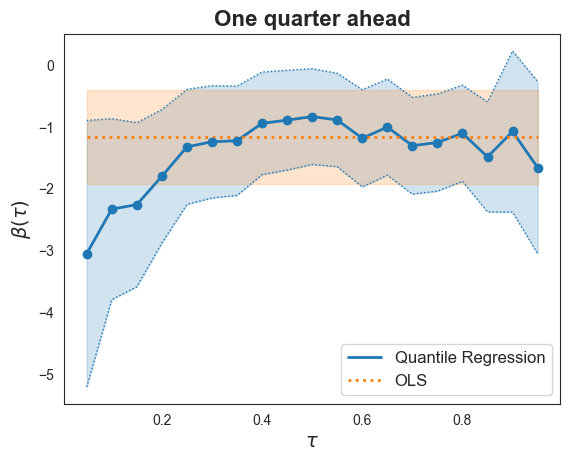

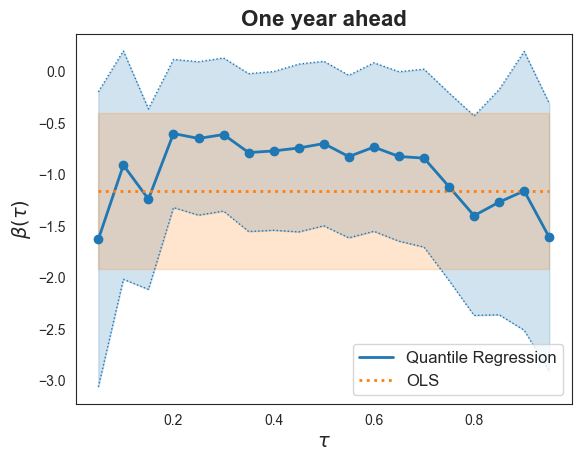

In [60]:

plt.plot(models_summary_df_1_quart.q, models_summary_df_1_quart.b, color="#1f77b4", label="Quantile Regression",
         linewidth=2)
plt.plot(models_summary_df_1_quart.q, models_summary_df_1_quart.ub, linestyle="dotted", color="#1f77b4", linewidth=1)
plt.plot(models_summary_df_1_quart.q, models_summary_df_1_quart.lb, linestyle="dotted", color="#1f77b4", linewidth=1)

# Fill the area between the upper and lower bounds of the quantile regression
plt.fill_between(models_summary_df_1_quart.q, models_summary_df_1_quart.lb, models_summary_df_1_quart.ub,
                 color='#1f77b4', alpha=0.2)

plt.scatter(models_summary_df_1_quart.q, models_summary_df_1_quart.b, color="#1f77b4", edgecolor='face', zorder=5)

# Plot OLS line and fill the confidence interval
plt.plot(models_summary_df_1_quart.q, [ols_model_summary["b"]] * len(models_summary_df_1_quart.q), color="#ff7f0e",
         linestyle="dotted",
         label="OLS", linewidth=2)
plt.fill_between(models_summary_df_1_quart.q, [ols_model_summary["lb"]] * len(models_summary_df_1_quart.q),
                 [ols_model_summary["ub"]] * len(models_summary_df_1_quart.q), color='#ff7f0e', alpha=0.2)

plt.xlabel(r"$\tau$", fontsize=14)
plt.ylabel(r"$\beta(\tau)$", fontsize=14)
plt.title("One quarter ahead", fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.show()

plt.plot(models_summary_df_4_quart.q, models_summary_df_4_quart.b, color="#1f77b4", label="Quantile Regression",
         linewidth=2)
plt.plot(models_summary_df_4_quart.q, models_summary_df_4_quart.ub, linestyle="dotted", color="#1f77b4", linewidth=1)
plt.plot(models_summary_df_4_quart.q, models_summary_df_4_quart.lb, linestyle="dotted", color="#1f77b4", linewidth=1)

# Fill the area between the upper and lower bounds of the quantile regression
plt.fill_between(models_summary_df_4_quart.q, models_summary_df_4_quart.lb, models_summary_df_4_quart.ub,
                 color='#1f77b4', alpha=0.2)

plt.scatter(models_summary_df_4_quart.q, models_summary_df_4_quart.b, color="#1f77b4", edgecolor='face', zorder=5)

# Plot OLS line and fill the confidence interval
plt.plot(models_summary_df_4_quart.q, [ols_model_summary["b"]] * len(models_summary_df_4_quart.q), color="#ff7f0e",
         linestyle="dotted",
         label="OLS", linewidth=2)
plt.fill_between(models_summary_df_4_quart.q, [ols_model_summary["lb"]] * len(models_summary_df_4_quart.q),
                 [ols_model_summary["ub"]] * len(models_summary_df_4_quart.q), color='#ff7f0e', alpha=0.2)

plt.xlabel(r"$\tau$", fontsize=14)
plt.ylabel(r"$\beta(\tau)$", fontsize=14)
plt.title("One year ahead", fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.show()



# Realization vs Predicted distributions

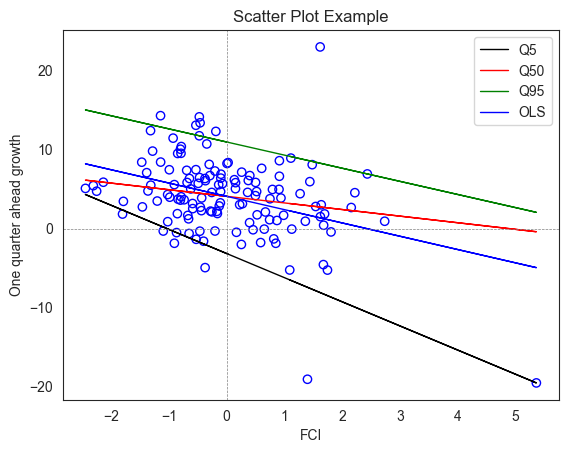

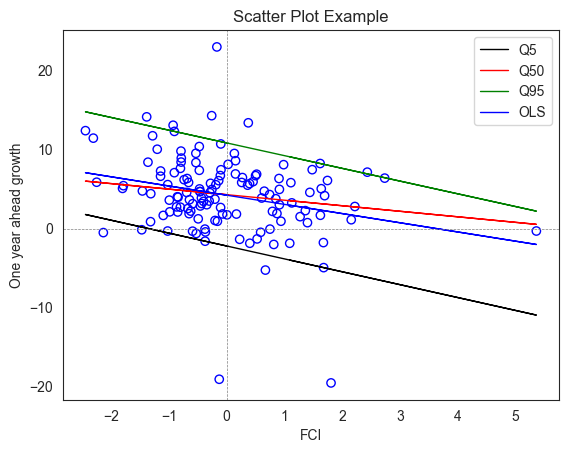

In [61]:
sns.set_style('white')

plt.scatter(q_predict_1_quart['double_pca_fci'], q_predict_1_quart['realized_ggdp_growth'], facecolors='none',
            edgecolors='b')

plt.plot(q_predict_1_quart['double_pca_fci'], q_predict_1_quart[0.05], color="black", linestyle='solid', label="Q5",
         linewidth=1)
plt.plot(q_predict_1_quart['double_pca_fci'], q_predict_1_quart[0.5], color="red", linestyle='solid', label="Q50",
         linewidth=1)
plt.plot(q_predict_1_quart['double_pca_fci'], q_predict_1_quart[0.95], color="green", linestyle='solid', label="Q95",
         linewidth=1)
plt.plot(q_predict_1_quart['double_pca_fci'], q_predict_1_quart['ols'], color="blue", linestyle='solid', label="OLS",
         linewidth=1)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)

plt.title('Scatter Plot Example')
plt.xlabel('FCI')
plt.ylabel('One quarter ahead growth')
plt.legend()
plt.show()

plt.scatter(q_predict_4_quart['double_pca_fci'], q_predict_4_quart['realized_ggdp_growth'], facecolors='none',
            edgecolors='b')

plt.plot(q_predict_4_quart['double_pca_fci'], q_predict_4_quart[0.05], color="black", linestyle='solid', label="Q5",
         linewidth=1)
plt.plot(q_predict_4_quart['double_pca_fci'], q_predict_4_quart[0.5], color="red", linestyle='solid', label="Q50",
         linewidth=1)
plt.plot(q_predict_4_quart['double_pca_fci'], q_predict_4_quart[0.95], color="green", linestyle='solid', label="Q95",
         linewidth=1)
plt.plot(q_predict_4_quart['double_pca_fci'], q_predict_4_quart['ols'], color="blue", linestyle='solid', label="OLS",
         linewidth=1)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)

plt.title('Scatter Plot Example')
plt.xlabel('FCI')
plt.ylabel('One year ahead growth')
plt.legend()
plt.show()

## Predicted Distributions

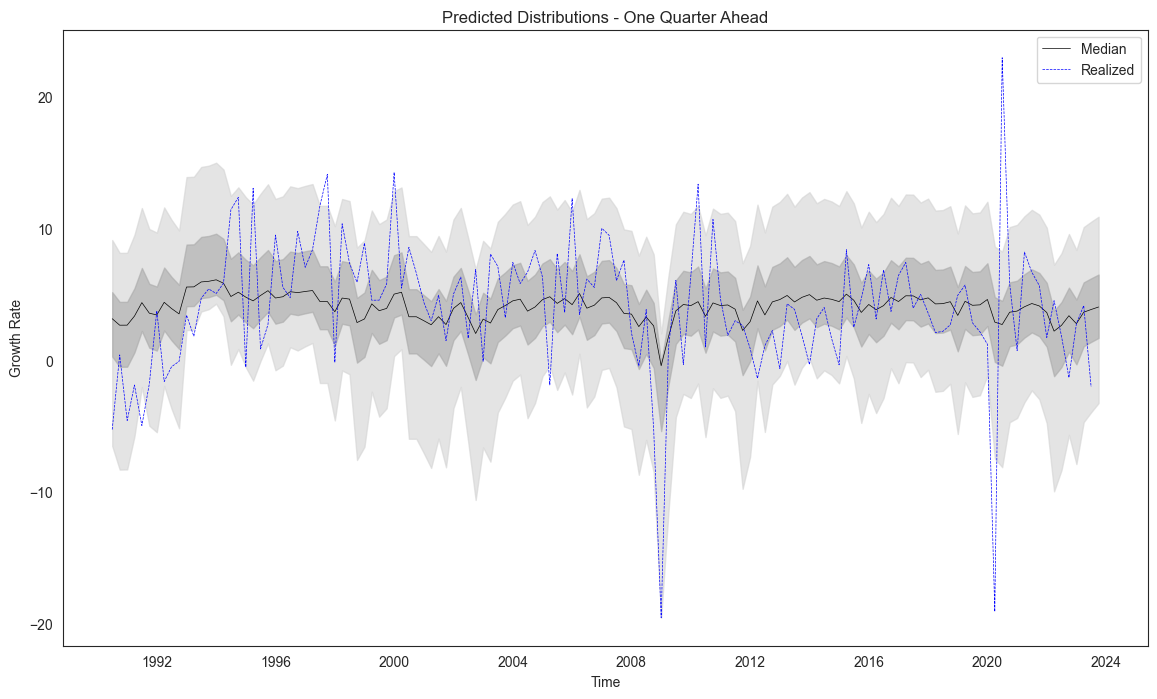

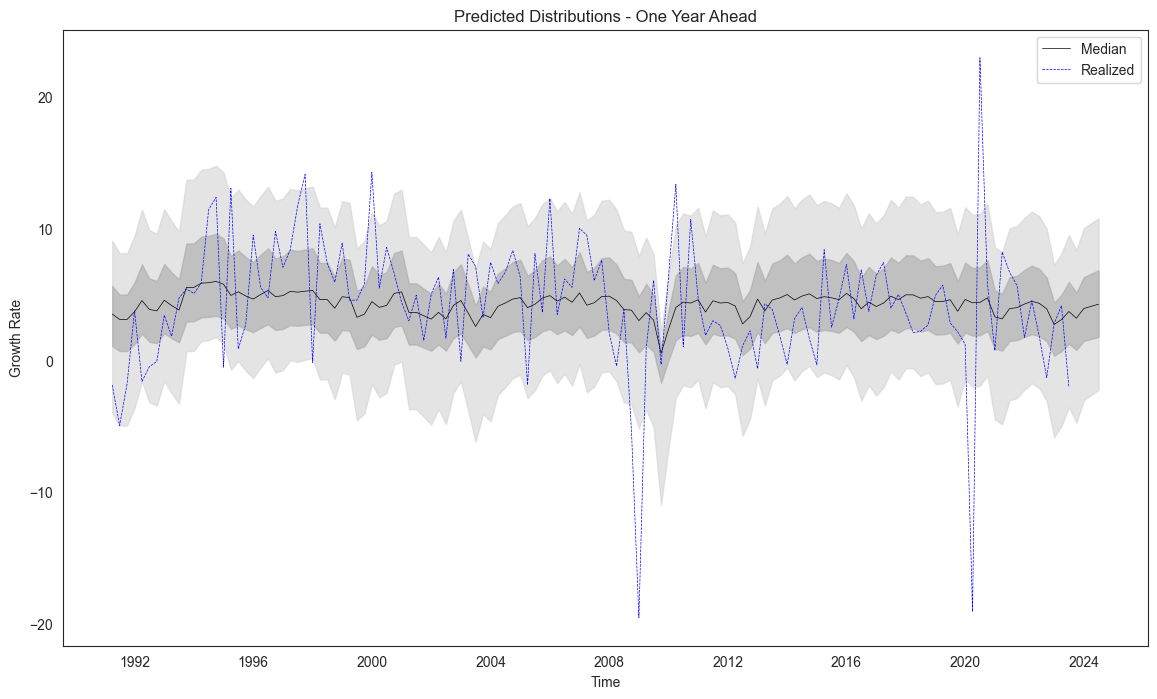

In [62]:

# 1 quarter ahead

t = q_predict_1_quart.index
plt.figure(figsize=(14, 8))
# Plot the quantiles
plt.plot(t, q_predict_1_quart[0.5], color="black", linestyle='-', label="Median", linewidth=0.5)
# Plot the realized values
plt.plot(t, q_predict_1_quart['realized_ggdp_growth'], color="blue", linestyle='--', label="Realized", linewidth=0.5)
# Fill between the quantiles
plt.fill_between(t, q_predict_1_quart[0.05], q_predict_1_quart[0.95], color="lightgrey", alpha=0.6)
plt.fill_between(t, q_predict_1_quart[0.25], q_predict_1_quart[0.75], color="darkgrey", alpha=0.6)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Growth Rate')
plt.title('Predicted Distributions - One Quarter Ahead')
plt.legend()
plt.show()

# 1 year ahead

t = q_predict_4_quart.index
plt.figure(figsize=(14, 8))
# Plot the quantiles
plt.plot(t, q_predict_4_quart[0.5], color="black", linestyle='-', label="Median", linewidth=0.5)
# Plot the realized values
plt.plot(t, q_predict_4_quart['realized_ggdp_growth'], color="blue", linestyle='--', label="Realized", linewidth=0.5)
# Fill between the quantiles
plt.fill_between(t, q_predict_4_quart[0.05], q_predict_4_quart[0.95], color="lightgrey", alpha=0.6)
plt.fill_between(t, q_predict_4_quart[0.25], q_predict_4_quart[0.75], color="darkgrey", alpha=0.6)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Growth Rate')
plt.title('Predicted Distributions - One Year Ahead')
plt.legend()
plt.show()

# Fitting a skew t distribution

In [3]:
# from typing import Tuple
# import pickle
# 
# from skewt_scipy.skewt import skewt
# from scipy.optimize import minimize
# 
# run_minimization = True
# 
# 
# def quantile_RSS(params: Tuple, quantiles_data: dict) -> float:
#     """
#     
#     :param quantiles_data: data about all quantile estimates at a given specific time t
#     :param mu: 
#     :param sigma: 
#     :param alpha: 
#     :param nu: 
#     :return: 
#     """
#     mu, sigma, alpha, nu = params
#     rss = 0
#     for q, q_hat in quantiles_data.items():
#         rss += (q_hat - skewt.ppf(q=q, a=alpha, df=nu, loc=mu, scale=sigma)) ** 4
#     return rss
# 
# # quantiles_data_df = q_predict_4_quart[[quantiles]]
# quantiles_data_df = q_predict_4_quart[[0.05, 0.25, 0.75, 0.95]]
# #each row is a quarter, each column is a quantile
# quantiles_data = quantiles_data_df.to_dict('records')
# 
# # bounds for (respectively): mu, sigma, alpha, nu
# bounds = [(None, None), (1e-6, None), (None, None), (1e-6, None)]
# 
# mu_init_guess = q_predict_4_quart['ols'].mean()
# sigma_init_guess = q_predict_4_quart['ols'].std()
# initial_guess = [mu_init_guess, sigma_init_guess, 0, 1]
# 
# 
# # res_list = []
# # curr_res = minimize(quantile_RSS, initial_guess, args=(quantiles_data[0],), bounds=bounds, method='L-BFGS-B')
# # res_list.append(curr_res)
# 
# if run_minimization:
#     res_list = []
#     for i, quantiles_t in enumerate(quantiles_data):
#         #inital guess for mu, sigma, alpha, nu
#         # initial_guess = [, quantiles_data_df[q].std(), 0, 1]
#         curr_res = minimize(quantile_RSS, initial_guess, args=(quantiles_t,), bounds=bounds, method='L-BFGS-B')
#         print()
#         res_list.append(curr_res)
# 
# with open('gar_analysis/skewed_t_min_results.pkl', 'wb') as f:
#     pickle.dump(res_list, f)



KeyboardInterrupt: 